In [4]:
import numpy as np
import pandas as pd
import os 
import string
import sys
from skimage.io import imread

In [19]:
data=pd.read_csv(r"C:\Users\faps2\neyronochky\text_recognotion\Train.csv",header=0)

In [20]:
data.head

<bound method NDFrame.head of          0.png  f
0        1.png  H
1        2.png  n
2        3.png  K
3        4.png  o
4        5.png  z
5        6.png  X
6        7.png  E
7        8.png  w
8        9.png  5
9       10.png  s
10      11.png  K
11      12.png  r
12      13.png  X
13      14.png  t
14      15.png  T
15      16.png  N
16      17.png  E
17      18.png  4
18      19.png  f
19      20.png  o
20      21.png  t
21      22.png  d
22      23.png  p
23      24.png  1
24      25.png  A
25      26.png  e
26      27.png  A
27      28.png  F
28      29.png  u
29      30.png  N
...        ... ..
4969  4970.png  W
4970  4971.png  F
4971  4972.png  K
4972  4973.png  j
4973  4974.png  k
4974  4975.png  4
4975  4976.png  t
4976  4977.png  t
4977  4978.png  S
4978  4979.png  m
4979  4980.png  x
4980  4981.png  k
4981  4982.png  l
4982  4983.png  n
4983  4984.png  H
4984  4985.png  6
4985  4986.png  h
4986  4987.png  D
4987  4988.png  X
4988  4989.png  7
4989  4990.png  C
4990  4991.png  

In [55]:
# MAX_CHAR = 64
def LoadData(FP = '.'):
    TFP = os.path.join(FP, 'Train.csv')
    A, Y, T, FN = [], [], [], []
    with open(TFP) as F:
        for Li in F:
            FNi, Yi = Li.strip().split(',')  #filename,string
            if(Yi == ''):
                Yi = " "
            T.append(Yi) #the letter in the picture
            A.append(imread(os.path.join(FP, '', FNi))) #updated array of symbols
            Y.append(list(Yi))   #list of letters
#             A.append(imread(os.path.join(FP, '', FNi)))
#             Y.append(list(Yi) + [' '] * (MAX_CHAR - len(Yi)))  
            FN.append(FNi) #connection between the table and pictures
    return np.stack(A), np.stack(Y), np.stack(T), np.stack(FN)

In [56]:
A, Y, T, FN = LoadData(FP = r'C:\Users\faps2\neyronochky\text_recognotion') #current directory

In [57]:
Y[1]

array(['H'], dtype='<U1')

In [58]:
A.reshape([-1,28*28]) #translate pictures to vectors

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 213, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 204],
       [204, 204, 251, ..., 255,  52,  52],
       [ 52,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [59]:
print(A.shape)
print(A.reshape([-1,28*28*3]).shape)  #translate pictures to vectors

(5000, 28, 28, 3)
(5000, 2352)


In [60]:
X=A 

In [61]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

Представляем текст в виде векторов

In [62]:
import string          
CS = list(string.ascii_letters) + list(string.digits) + list(" ")

Представление буквы числом

In [63]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CS)
le.transform(CS[1:5])

array([38, 39, 40, 41], dtype=int64)

Преобразовываем Y в вектор

In [64]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(np.expand_dims(le.transform(CS),1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [65]:
Y=le.transform(Y)
Y=enc.transform(np.expand_dims(Y,1))

C:\Users\faps2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
left = 0 #0
middle = 4500 #4500
right = 5000 #5000
X_train=X[left:middle]
X_test=X[middle:right]
Y_train=Y[left:middle,:]
Y_test=Y[middle:right,:]

In [67]:
scaler = StandardScaler()
shape=X_train.shape
X_train=X_train.reshape((shape[0],-1))
X_train=scaler.fit_transform(X_train)
X_train=X_train.reshape(shape)
shape=X_test.shape
X_test=X_test.reshape((shape[0],-1))
X_test=scaler.transform(X_test)
X_test=X_test.reshape(shape)

C:\Users\faps2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
print(Y_train.shape)

(4500, 63)


In [72]:
model = Sequential()  
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(63, activation='softmax'))

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
model.fit(X_train, Y_train, epochs=40, batch_size=200)

Epoch 1/50
4500/4500 [==============================] - 19s 4ms/step - loss: 4.1426 - acc: 0.0196
Epoch 2/50
4500/4500 [==============================] - 16s 4ms/step - loss: 4.0042 - acc: 0.0476
Epoch 3/50
4500/4500 [==============================] - 16s 3ms/step - loss: 3.3959 - acc: 0.1467
Epoch 4/50
4500/4500 [==============================] - 18s 4ms/step - loss: 2.6687 - acc: 0.2711
Epoch 5/50
4500/4500 [==============================] - 16s 4ms/step - loss: 1.9927 - acc: 0.4131
Epoch 6/50
4500/4500 [==============================] - 15s 3ms/step - loss: 1.5562 - acc: 0.5273
Epoch 7/50
4500/4500 [==============================] - 15s 3ms/step - loss: 1.1650 - acc: 0.6302
Epoch 8/50
4500/4500 [==============================] - 15s 3ms/step - loss: 0.9061 - acc: 0.7064
Epoch 9/50
4500/4500 [==============================] - 15s 3ms/step - loss: 0.7427 - acc: 0.7589
Epoch 10/50
4500/4500 [==============================] - 16s 4ms/step - loss: 0.6147 - acc: 0.7964
Epoch 11/50
4500/45

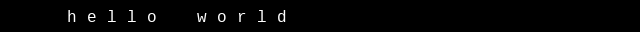

In [98]:
from PIL import Image
img=Image.open(r'C:\Users\faps2\neyronochky\text_recognotion\hello.png')
img

In [99]:
img = np.asarray(img)
img.shape

(32, 640, 3)

In [100]:
picture = img

In [101]:
img.shape[1]

640

In [102]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
size = 28
np.seterr(all='ignore', invalid = 'ignore')
y=0
while(True):
    if y>img.shape[0]-size:
        break
    x=0
    while(True):
        if x>img.shape[1]-size:
            break
        X=picture[y:y+size, x:x+size, :] 
        X=np.expand_dims(X,0)
        shape=X.shape
        X=X.reshape((shape[0],-1))
        X=scaler.transform(X)
        X=X.reshape(shape)
        #print(X.shape)
        pred=model.predict([X])
        answer=np.argmax(pred)
        #print(le.inverse_transform([answer]))
        if pred.size>0 and pred[0][answer]>0.90:
            #print(answer)
            print(le.inverse_transform([answer]))
        x=x+int(size/2)
    y=y+int(size/2)

C:\Users\faps2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[' ']
[' ']
[' ']
[' ']
['h']
['e']
['l']
['l']
['o']
[' ']
[' ']
['w']
['o']
['r']
['l']
['d']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']


In [103]:
count=0
size=len(X_test)
for i in range(size):
    if np.argmax(Y_test[i])==np.argmax(model.predict(np.expand_dims(X_test[i],0))[0]):
        count=count+1
    
print('Точность предсказания: ',(100*count/size),'%')

Точность предсказания:  97.2 %
